<a href="https://colab.research.google.com/github/Zenith1618/Groceries-Market-Basket-/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import csv

In [4]:
with open("/content/groceries.csv", newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [6]:
import mlxtend.frequent_patterns
import mlxtend.preprocessing

encode = mlxtend.preprocessing.TransactionEncoder()

encode_arr = encode.fit(data).transform(data)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
print(encode_arr)

[[False False False ... False False False]
 [False False False ... False  True False]
 [False False False ...  True False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Converting into df

df = pd.DataFrame(encode_arr, columns = encode.columns_)
df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Support Calculation

md_minsup = mlxtend.frequent_patterns.apriori(df, min_support = 0.01, use_colnames = True)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
md_minsup.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


In [16]:
# Creating rules (Metric: Confidence) Antecedents ⇒ Consequents

rules = mlxtend.frequent_patterns.association_rules(
    md_minsup, metric = "confidence", min_threshold = 0.06, support_only = False
)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
rules.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,1.0,0.009574,1.055095,0.601792,0.087191,0.052218,0.238957
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,1.0,0.009574,1.292416,0.512224,0.087191,0.226255,0.238957
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,1.0,0.003975,1.102329,0.307866,0.061159,0.092830,0.166882
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,1.0,0.003975,1.023337,0.357463,0.061159,0.022805,0.166882
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,1.0,0.011668,1.127366,0.753189,0.120677,0.112977,0.245455


In [18]:
# Creating rules (Metric: Lift) Antecedents ⇒ Consequents

rules2 = mlxtend.frequent_patterns.association_rules(
    md_minsup, metric = "lift", min_threshold = 0.06, support_only = False
)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
rules2.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,1.0,0.009574,1.055095,0.601792,0.087191,0.052218,0.238957
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,1.0,0.009574,1.292416,0.512224,0.087191,0.226255,0.238957
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,1.0,0.003975,1.102329,0.307866,0.061159,0.092830,0.166882
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,1.0,0.003975,1.023337,0.357463,0.061159,0.022805,0.166882
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,1.0,0.011668,1.127366,0.753189,0.120677,0.112977,0.245455


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


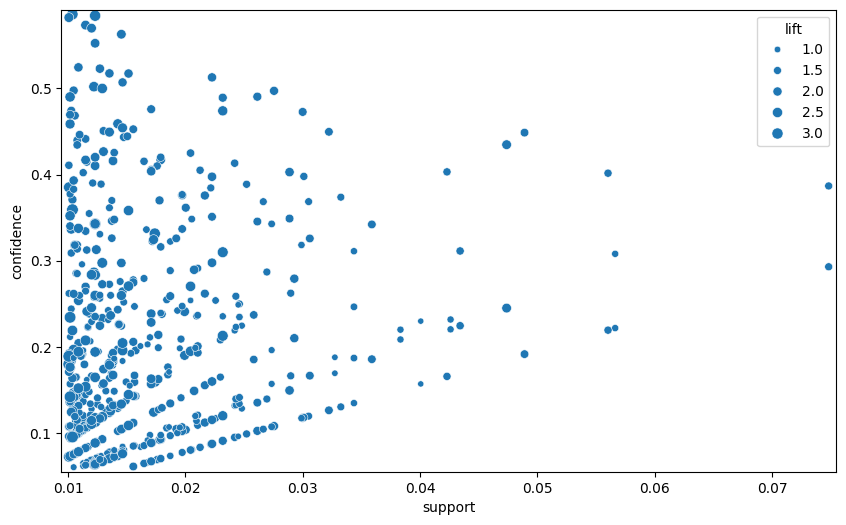

In [21]:
# Scatter plots help us to evaluate general tendencies of rules between antecedents and consequents.
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence",
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()